## Preparación Datos y Modelado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

# Tipos de Variables

VARIABLE DESCRIPTIONS
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd): Categórica 
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination

**Ejemplo:** Crear un objeto DataFrame con base en un archivo .csv

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Valores nulos
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'


In [10]:
titanic["Embarked"] = titanic["Embarked"].fillna('C')
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

## Variables Cuantitativas

### Medidas de tendencia central


In [12]:
#Edad
#Se puede obtener la media, mediana y moda para
mean_age = titanic['Age'].mean()
median_age =titanic['Age'].median()
mode_age = titanic['Age'].mode()
print("Mean_age:",mean_age)
print("Median_age:",median_age)
print("Mode_age:",mode_age)

Mean_age: 29.36158249158249
Median_age: 28.0
Mode_age: 0    28.0
dtype: float64


Conclusiones:
La edad promedio fue 29
La edad al centro es 28
La edad más repetida fue de 24

# Variables Categóricas

In [13]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
# Create a family size variable including the passenger themselves
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]+1
print(titanic["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


## Consulta

Crea un subconjunto de **titanic** para el costo mayor a 500

In [17]:
# identifica los titanic con costo mayor a 500
titanic.Fare>50

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [18]:
# usa el criterio para extraer solo los boletos caros
boletos_caros = titanic[titanic.Fare >= 50]
boletos_caros

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,3
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S,11
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,1
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,3


In [19]:
# crea un índice alfanumérico con base en "name"
boletos_caros = boletos_caros.set_index('Name')

In [20]:
boletos_caros.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
Name,,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S,1
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,28.0,1,0,PC 17569,146.5208,B78,C,2


## Operaciones de ordenamiento

In [21]:
# ordenar por etiquetas de renglón
boletos_caros.sort_index().head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
Name,,,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",731,1,1,female,29.00,0,0,24160,211.3375,B5,S,1
"Allison, Master. Hudson Trevor",306,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S,4
"Allison, Miss. Helen Loraine",298,0,1,female,2.00,1,2,113781,151.5500,C22 C26,S,4
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",499,0,1,female,25.00,1,2,113781,151.5500,C22 C26,S,4
"Andrews, Miss. Kornelia Theodosia",276,1,1,female,63.00,1,0,13502,77.9583,D7,S,2


In [22]:
# ordenar por etiqueta de columnas
boletos_caros.sort_index(axis = 1).head()

,Age,Cabin,Embarked,FamilySize,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
Name,,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,C85,C,2,71.2833,0,2,1,female,1,1,PC 17599
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123,S,2,53.1000,0,4,1,female,1,1,113803
"McCarthy, Mr. Timothy J",54.0,E46,S,1,51.8625,0,7,1,male,0,0,17463
"Fortune, Mr. Charles Alexander",19.0,C23 C25 C27,S,6,263.0000,2,28,1,male,3,0,19950
"Spencer, Mrs. William Augustus (Marie Eugenie)",28.0,B78,C,2,146.5208,0,32,1,female,1,1,PC 17569


In [23]:
# ordenar por valores de columna usando "order field"
boletos_caros.Age.sort_values(ascending=False).head()

Name
Crosby, Capt. Edward Gifford                 70.0
Ostby, Mr. Engelhart Cornelius               65.0
Fortune, Mr. Mark                            64.0
Andrews, Miss. Kornelia Theodosia            63.0
Stone, Mrs. George Nelson (Martha Evelyn)    62.0
Name: Age, dtype: float64

In [24]:
# Ordenar los valores de columnas usando el método
# sort_values()

boletos_caros.sort_values('Age', ascending=False).head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
Name,,,,,,,,,,,,
"Crosby, Capt. Edward Gifford",746,0,1,male,70.0,1,1,WE/P 5735,71.0000,B22,S,3
"Ostby, Mr. Engelhart Cornelius",55,0,1,male,65.0,0,1,113509,61.9792,B30,C,2
"Fortune, Mr. Mark",439,0,1,male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6
"Andrews, Miss. Kornelia Theodosia",276,1,1,female,63.0,1,0,13502,77.9583,D7,S,2
"Stone, Mrs. George Nelson (Martha Evelyn)",830,1,1,female,62.0,0,0,113572,80.0000,B28,C,1


In [25]:
# ordenar los valores de varias columnas
boletos_caros.sort_values(['Sex', 'Age'], 
                   ascending=[False,True]).head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
Name,,,,,,,,,,,,
"Allison, Master. Hudson Trevor",306,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S,4
"Dodge, Master. Washington",446,1,1,male,4.00,0,2,33638,81.8583,A34,S,3
"Carter, Master. William Thornton II",803,1,1,male,11.00,1,2,113760,120.0000,B96 B98,S,4
"Thayer, Mr. John Borland Jr",551,1,1,male,17.00,0,2,17421,110.8833,C70,C,3
"Davies, Mr. Charles Henry",386,0,2,male,18.00,0,0,S.O.C. 14879,73.5000,NaN,S,1
"Penasco y Castellana, Mr. Victor de Satode",506,0,1,male,18.00,1,0,PC 17758,108.9000,C65,C,2
"Fortune, Mr. Charles Alexander",28,0,1,male,19.00,3,2,19950,263.0000,C23 C25 C27,S,6
"Marvin, Mr. Daniel Warner",749,0,1,male,19.00,1,0,113773,53.1000,D30,S,2
"Hood, Mr. Ambrose Jr",73,0,2,male,21.00,0,0,S.O.C. 14879,73.5000,NaN,S,1


In [26]:
# top 10 de Edad
top10 = boletos_caros.Fare.sort_values(ascending=False).head(10)
top10

Name
Ward, Miss. Anna                                   512.3292
Cardeza, Mr. Thomas Drake Martinez                 512.3292
Lesurer, Mr. Gustave J                             512.3292
Fortune, Mr. Mark                                  263.0000
Fortune, Mr. Charles Alexander                     263.0000
Fortune, Miss. Alice Elizabeth                     263.0000
Fortune, Miss. Mabel Helen                         263.0000
Ryerson, Miss. Emily Borie                         262.3750
Ryerson, Miss. Susan Parker "Suzette"              262.3750
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    247.5208
Name: Fare, dtype: float64

In [27]:
type(top10)

pandas.core.series.Series

In [28]:
top10

Name
Ward, Miss. Anna                                   512.3292
Cardeza, Mr. Thomas Drake Martinez                 512.3292
Lesurer, Mr. Gustave J                             512.3292
Fortune, Mr. Mark                                  263.0000
Fortune, Mr. Charles Alexander                     263.0000
Fortune, Miss. Alice Elizabeth                     263.0000
Fortune, Miss. Mabel Helen                         263.0000
Ryerson, Miss. Emily Borie                         262.3750
Ryerson, Miss. Susan Parker "Suzette"              262.3750
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    247.5208
Name: Fare, dtype: float64

# Visualización de datos

## Variables Categóricas

<AxesSubplot:>

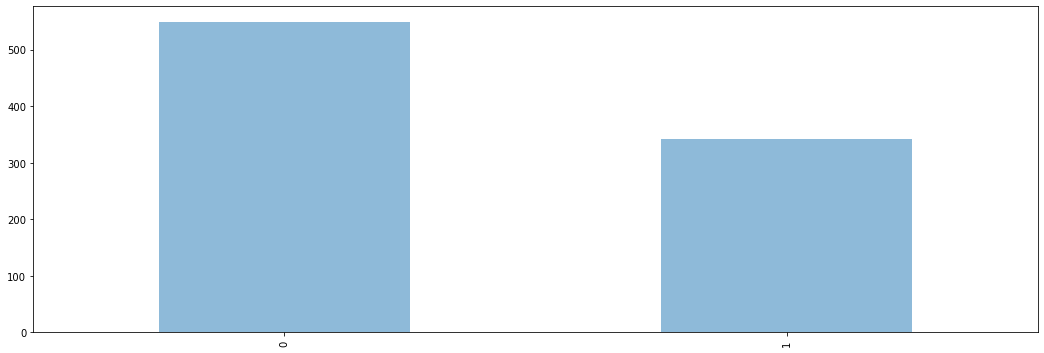

In [29]:
import matplotlib.pyplot as plt       ## wonderful library for data plotting
fig = plt.figure(figsize=(18,6))      ## To get a figure with proper structure

titanic.Survived.value_counts().plot(kind="bar",alpha=0.5)  

<AxesSubplot:>

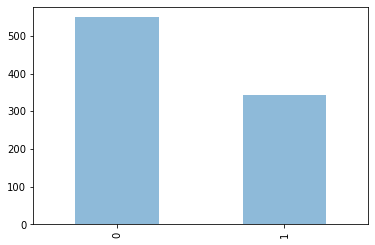

In [30]:
titanic.Survived.value_counts().plot(kind="bar",alpha=0.5)  

<AxesSubplot:>

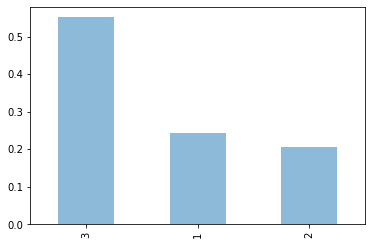

In [31]:
titanic.Pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

<AxesSubplot:>

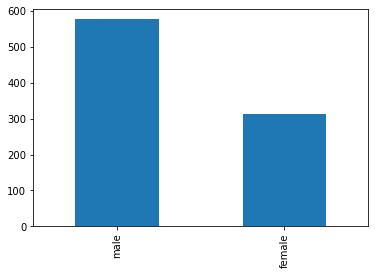

In [32]:
plotData=titanic.Sex.value_counts()
plotData.plot(kind='bar')

<AxesSubplot:ylabel='Sex'>

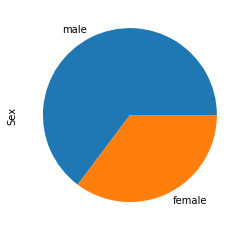

In [33]:
plotData.plot(kind='pie')

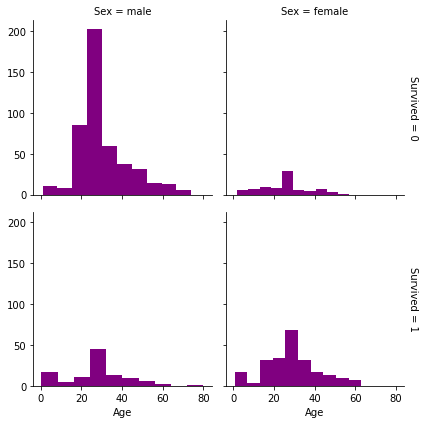

In [34]:
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

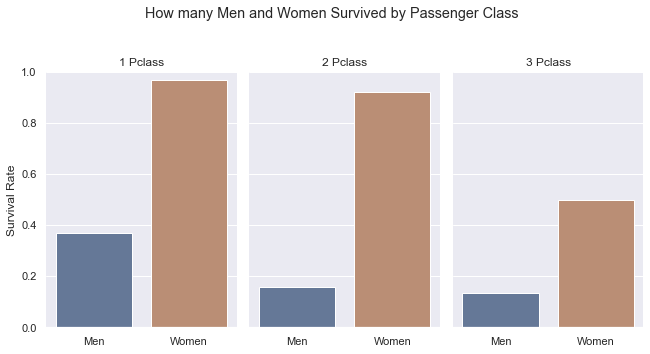

In [35]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

## Variables Cuantitativas

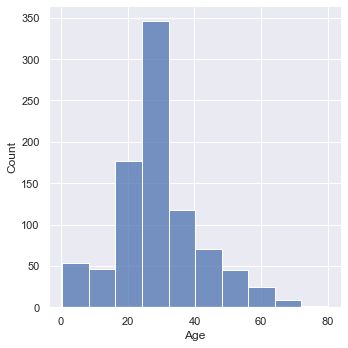

In [36]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.displot(titanic['Age'], bins=10)
plt.show()

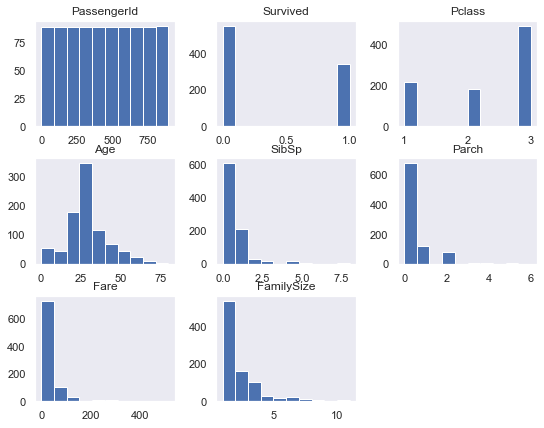

In [37]:
titanic.hist(bins=10,figsize=(9,7),grid=False);

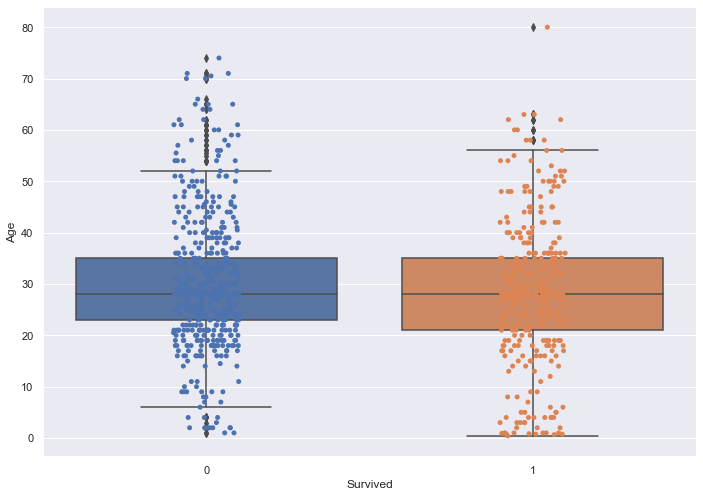

In [38]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)

ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="gray")

In [39]:
correlation_matrix = titanic.corr().round(2)

<AxesSubplot:>

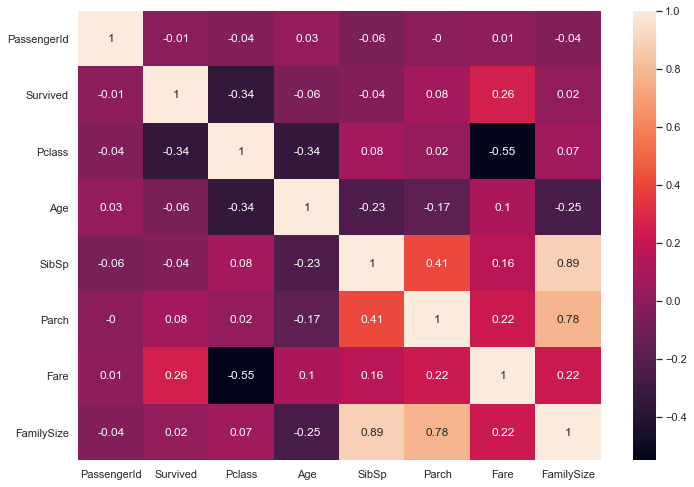

In [40]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

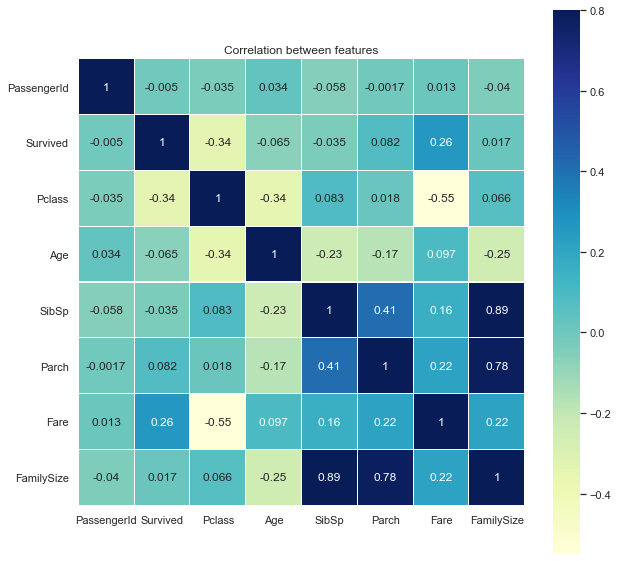

In [41]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

Looks like Pclass has got highest negative correlation with "Survived" followed by Fare, Parch and Age

## Preparación de Datos

Algunas características como Name, Ticket, Cabin y Embarked no tienen impacto en si los pasajeros sobrevivieron o no.  
Frecuentemente es mejor entrenar el modelo con sólo las características significativas quitando las que no tienen ningún impacto.

In [42]:
titanic_prep = titanic.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [43]:
titanic_prep.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,2
1,2,1,1,female,38.0,1,0,71.2833,2
2,3,1,3,female,26.0,0,0,7.9250,1
3,4,1,1,female,35.0,1,0,53.1000,2
4,5,0,3,male,35.0,0,0,8.0500,1


Convertir la característica'Sex' a numérica (es la única que no es numérica) usando Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
titanic_prep['Sex'] = label.fit_transform(titanic_prep['Sex'])

In [45]:
titanic_prep.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,1


In [46]:
#Llenar los datos que faltan de edad con la mediana
titanic_prep['Age']=titanic_prep['Age'].fillna(titanic_prep['Age'].median())

In [48]:
titanic_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   FamilySize   891 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.3 KB


In [ ]:
#Quitar la característica de la clase
titanic_prep = titanic_prep.drop(['Survived'], axis=1)

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(titanic_prep)

KMeans(n_clusters=2)